### 1. Предобработка данных
Первым пунктом при выполнении задания является предобработка данных. Необходимо: загрузить данные, попробовать их вывести, получить основную инфомрацию о датасете, а далее заняться выявление проблем и предобработкой

#### Импорт библиотек и загрузка данных

In [2]:
import pandas as pd
import numpy as np

# Импорт данных
df = pd.read_csv('HR-Employee-Attrition.csv')
# Будем использовать только выбранные 10 столбцов. Они мне показались наиболее информативными при анализе
df = df[['Age', 'Gender', 'Department', 'DistanceFromHome', 'EducationField', 'JobRole', 
         'MonthlyIncome', 'OverTime', 'TotalWorkingYears', 'WorkLifeBalance', 'Attrition']]

Испортированые основные библиотеки для работы с данными. Возможно этот блок будет дополняться другими библиотеками, но пока оставим так. Также загрузили исходный файл и выбрали 11 колонок из 35, которые нам понадобятся для дальнейшего анализа.

#### Просмотр нескольких строк и вывод информации о датасете

In [3]:
# Имена столбцов и типы данных
df.info()

# Статистика по числовым данным
df.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                1470 non-null   int64 
 1   Gender             1470 non-null   object
 2   Department         1470 non-null   object
 3   DistanceFromHome   1470 non-null   int64 
 4   EducationField     1470 non-null   object
 5   JobRole            1470 non-null   object
 6   MonthlyIncome      1470 non-null   int64 
 7   OverTime           1470 non-null   object
 8   TotalWorkingYears  1470 non-null   int64 
 9   WorkLifeBalance    1470 non-null   int64 
 10  Attrition          1470 non-null   object
dtypes: int64(5), object(6)
memory usage: 126.5+ KB


,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears,WorkLifeBalance
count,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,9.19,6502.93,11.28,2.76
std,9.14,8.11,4707.96,7.78,0.71
min,18.00,1.00,1009.00,0.00,1.00
25%,30.00,2.00,2911.00,6.00,2.00
50%,36.00,7.00,4919.00,10.00,3.00
75%,43.00,14.00,8379.00,15.00,3.00
max,60.00,29.00,19999.00,40.00,4.00


Получив основную информацию о датасете можно сделать вывод, что в датасете отсутствуют нулевые значениям по всем перечисленным колонкам, датасет содержит данные двух типов: числовые и строчные (в дальнейшем поменяем). В датасете 1470 записей и 11 колонок (выведено искусствено, всего 35 колонок).

In [4]:
# Первые 5 строк табилцы
df.head()

,Age,Gender,Department,DistanceFromHome,EducationField,JobRole,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,Attrition
0,41,Female,Sales,1,Life Sciences,Sales Executive,5993,Yes,8,1,Yes
1,49,Male,Research & Development,8,Life Sciences,Research Scientist,5130,No,10,3,No
2,37,Male,Research & Development,2,Other,Laboratory Technician,2090,Yes,7,3,Yes
3,33,Female,Research & Development,3,Life Sciences,Research Scientist,2909,Yes,8,3,No
4,27,Male,Research & Development,2,Medical,Laboratory Technician,3468,No,6,3,No


Вывели первые 5 строк таблицы для того, чтобы убедиться в том, что данные успешно загружены и отображается нужная для нас инфомрация.

#### Приведение названий столбцов к одному виду

In [5]:
# Переименуем столбцы в нижний регистр с подчёркиванием
df.columns = df.columns.str.lower()  

# Проверим
print(df.columns)  

Index(['age', 'gender', 'department', 'distancefromhome', 'educationfield',
       'jobrole', 'monthlyincome', 'overtime', 'totalworkingyears',
       'worklifebalance', 'attrition'],
      dtype='object')


Привели названия всех столбцов к нижнему регистру согласно заданию

#### Поиск пропусков

In [6]:
df.isnull().sum()  

age                  0
gender               0
department           0
distancefromhome     0
educationfield       0
jobrole              0
monthlyincome        0
overtime             0
totalworkingyears    0
worklifebalance      0
attrition            0
dtype: int64

В датасете отсутсвуют пропуски. Это сильно облегчает подготовку данных к дальнейшему анализу

#### Изменение типов данных

In [7]:
# Преобразуем performancerating в категорию (1, 2, 3 – это оценка производительности, не числа)
df['worklifebalance'] = df['worklifebalance'].astype('category')
df['attrition'] = df['attrition'].replace({'Yes': 1, 'No': 0})
df['attrition'] = df['attrition'].astype(bool)
df['overtime'] = df['overtime'].replace({'Yes': 1, 'No': 0})
df['overtime'] = df['overtime'].astype(bool)
# Проверим
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                1470 non-null   int64   
 1   gender             1470 non-null   object  
 2   department         1470 non-null   object  
 3   distancefromhome   1470 non-null   int64   
 4   educationfield     1470 non-null   object  
 5   jobrole            1470 non-null   object  
 6   monthlyincome      1470 non-null   int64   
 7   overtime           1470 non-null   bool    
 8   totalworkingyears  1470 non-null   int64   
 9   worklifebalance    1470 non-null   category
 10  attrition          1470 non-null   bool    
dtypes: bool(2), category(1), int64(4), object(4)
memory usage: 96.5+ KB


C:\Users\vlad8\AppData\Local\Temp\ipykernel_12652\225333550.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['attrition'] = df['attrition'].replace({'Yes': 1, 'No': 0})
C:\Users\vlad8\AppData\Local\Temp\ipykernel_12652\225333550.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['overtime'] = df['overtime'].replace({'Yes': 1, 'No': 0})


Изменили 2 типа данных для столбцов: строковое значение привели к логическому типу, числовое значение сохранили как категорию

#### Проверка на полные дубликаты

In [8]:
df.duplicated().sum()

np.int64(0)

В наборе данных отсутствуют дубликаты данных. Это сильно облегчает дальнейшую обработку данных при подготовке их к анализу.

### 2. Исследовательский анализ

Следующим этапом работы с данными является исследовательский анализ. Необходимо провести индексацию данных (по координатам, логическая), сортировку данных, фильтрацию данных, построить сводные таблицы, группировка данных, дополнительный анализ.

#### Индексация данных

Для начала сделаем индексацию по координатам.

Вывод первых пяти строк с использованием координат. Мы уже выводили эти данные, но с использованием команды head.

In [9]:
# Первые 5 строк
df.iloc[:5]

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
0,41,Female,Sales,1,Life Sciences,Sales Executive,5993,True,8,1,True
1,49,Male,Research & Development,8,Life Sciences,Research Scientist,5130,False,10,3,False
2,37,Male,Research & Development,2,Other,Laboratory Technician,2090,True,7,3,True
3,33,Female,Research & Development,3,Life Sciences,Research Scientist,2909,True,8,3,False
4,27,Male,Research & Development,2,Medical,Laboratory Technician,3468,False,6,3,False


Вывод конкретных строк по координатам. В данном случае от 10 до 15 строки.

In [10]:
# Строки 10-15
df.iloc[10:16]

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
10,35,Male,Research & Development,16,Medical,Laboratory Technician,2426,False,6,3,False
11,29,Female,Research & Development,15,Life Sciences,Laboratory Technician,4193,True,10,3,False
12,31,Male,Research & Development,26,Life Sciences,Research Scientist,2911,False,5,2,False
13,34,Male,Research & Development,19,Medical,Laboratory Technician,2661,False,3,3,False
14,28,Male,Research & Development,24,Life Sciences,Laboratory Technician,2028,True,6,3,True
15,29,Female,Research & Development,21,Life Sciences,Manufacturing Director,9980,False,10,3,False


Для того чтобы вывести последние строки из таблицы можно ввести отрицательное значение в координаты строк.

In [11]:
# Последние 3 строки
df.iloc[-3:]

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
1467,27,Male,Research & Development,4,Life Sciences,Manufacturing Director,6142,True,6,3,False
1468,49,Male,Sales,2,Medical,Sales Executive,5390,False,17,2,False
1469,34,Male,Research & Development,8,Medical,Laboratory Technician,4404,False,6,4,False


Вывод конкретных строк с конкретными столбцами. Такая индексация позволяет отобразить нужные строки с выбранными столбцами.

In [12]:
# Выбор конкретных строк и столбцов (строки 5-10, столбцы 2-5)
df.iloc[5:11, 2:6]

,department,distancefromhome,educationfield,jobrole
5,Research & Development,2,Life Sciences,Laboratory Technician
6,Research & Development,3,Medical,Laboratory Technician
7,Research & Development,24,Life Sciences,Laboratory Technician
8,Research & Development,23,Life Sciences,Manufacturing Director
9,Research & Development,27,Medical,Healthcare Representative
10,Research & Development,16,Medical,Laboratory Technician


Также можно задать шаг вывода строк. Например выведем каждую сотую строку из таблицы.

In [13]:
# Каждая 100-я строка
df.iloc[::100]

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
0,41,Female,Sales,1,Life Sciences,Sales Executive,5993,True,8,1,True
100,37,Male,Human Resources,6,Human Resources,Human Resources,2073,True,7,3,True
200,27,Male,Research & Development,1,Technical Degree,Manufacturing Director,4298,False,6,3,False
300,41,Male,Sales,2,Life Sciences,Manager,16015,False,22,3,False
400,39,Male,Research & Development,1,Life Sciences,Manager,19197,True,21,3,False
500,32,Female,Research & Development,9,Life Sciences,Research Scientist,6322,True,6,2,False
600,32,Female,Research & Development,4,Life Sciences,Manufacturing Director,6162,False,14,3,False
700,58,Male,Research & Development,2,Technical Degree,Research Scientist,2479,False,7,3,True
800,28,Male,Research & Development,1,Medical,Laboratory Technician,2596,False,1,3,True
900,36,Male,Research & Development,3,Technical Degree,Research Scientist,3692,False,12,2,False


Далее приступим к логической индексации.

Выведем работников, которые старше 40 лет.

In [14]:
# Сотрудники с возрастом > 40 лет
df[df['age'] > 40]

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
0,41,Female,Sales,1,Life Sciences,Sales Executive,5993,True,8,1,True
1,49,Male,Research & Development,8,Life Sciences,Research Scientist,5130,False,10,3,False
6,59,Female,Research & Development,3,Medical,Laboratory Technician,2670,True,12,2,False
18,53,Female,Sales,2,Life Sciences,Manager,15427,False,31,3,False
25,53,Female,Research & Development,5,Other,Manager,19094,False,26,2,False
...,...,...,...,...,...,...,...,...,...,...,...
1448,41,Male,Sales,3,Life Sciences,Sales Executive,8938,False,14,3,False
1452,50,Male,Sales,1,Life Sciences,Sales Executive,6728,False,12,3,True
1454,45,Female,Sales,20,Life Sciences,Sales Executive,4850,False,8,3,False
1461,50,Male,Sales,28,Marketing,Sales Executive,10854,True,20,3,True


Теперь отобразим работников, которые имеют образование в сфере медицины

In [15]:
# Сотрудники с уровнем образования "Medical"
df[df['educationfield'] == 'Medical']

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
4,27,Male,Research & Development,2,Medical,Laboratory Technician,3468,False,6,3,False
6,59,Female,Research & Development,3,Medical,Laboratory Technician,2670,True,12,2,False
9,36,Male,Research & Development,27,Medical,Healthcare Representative,5237,False,17,2,False
10,35,Male,Research & Development,16,Medical,Laboratory Technician,2426,False,6,3,False
13,34,Male,Research & Development,19,Medical,Laboratory Technician,2661,False,3,3,False
...,...,...,...,...,...,...,...,...,...,...,...
1463,31,Male,Research & Development,5,Medical,Manufacturing Director,9936,False,10,3,False
1465,36,Male,Research & Development,23,Medical,Laboratory Technician,2571,False,17,3,False
1466,39,Male,Research & Development,6,Medical,Healthcare Representative,9991,False,9,3,False
1468,49,Male,Sales,2,Medical,Sales Executive,5390,False,17,2,False


Отобразим работников с опытом более 5 лет и зарплатой выше средней по списку

In [16]:
# Сотрудники с зарплатой выше среднего и с опытом > 5 лет
averageincom =  df['monthlyincome'].mean()
df[(df['monthlyincome'] > averageincom) & (df['totalworkingyears'] > 5)]

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
8,38,Male,Research & Development,23,Life Sciences,Manufacturing Director,9526,False,10,3,False
15,29,Female,Research & Development,21,Life Sciences,Manufacturing Director,9980,False,10,3,False
18,53,Female,Sales,2,Life Sciences,Manager,15427,False,31,3,False
22,34,Female,Research & Development,7,Life Sciences,Research Director,11994,False,13,3,False
25,53,Female,Research & Development,5,Other,Manager,19094,False,26,2,False
...,...,...,...,...,...,...,...,...,...,...,...
1453,36,Female,Sales,11,Marketing,Sales Executive,6652,False,8,2,False
1461,50,Male,Sales,28,Marketing,Sales Executive,10854,True,20,3,True
1462,39,Female,Sales,24,Marketing,Sales Executive,12031,False,21,2,False
1463,31,Male,Research & Development,5,Medical,Manufacturing Director,9936,False,10,3,False


Отобразим сотрудников с оценкой производительности 1 или 2

In [17]:
# Сотрудники с performancerating = 3 или 4
df[df['worklifebalance'].isin([3, 4]) & df['overtime'] == True]

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
2,37,Male,Research & Development,2,Other,Laboratory Technician,2090,True,7,3,True
3,33,Female,Research & Development,3,Life Sciences,Research Scientist,2909,True,8,3,False
11,29,Female,Research & Development,15,Life Sciences,Laboratory Technician,4193,True,10,3,False
14,28,Male,Research & Development,24,Life Sciences,Laboratory Technician,2028,True,6,3,True
19,38,Male,Research & Development,2,Life Sciences,Research Scientist,3944,True,6,3,False
...,...,...,...,...,...,...,...,...,...,...,...
1450,35,Female,Human Resources,26,Life Sciences,Human Resources,8837,True,9,3,False
1456,35,Male,Research & Development,18,Life Sciences,Healthcare Representative,5689,True,10,4,False
1459,29,Male,Research & Development,13,Other,Laboratory Technician,4025,True,10,3,False
1461,50,Male,Sales,28,Marketing,Sales Executive,10854,True,20,3,True


Отобразим информацию о расстоянии от дома до работы более 3 километров и переработках

In [18]:
df[(df['distancefromhome'] > 3) & df['overtime'] == True]

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
11,29,Female,Research & Development,15,Life Sciences,Laboratory Technician,4193,True,10,3,False
14,28,Male,Research & Development,24,Life Sciences,Laboratory Technician,2028,True,6,3,True
16,32,Male,Research & Development,5,Life Sciences,Research Scientist,3298,True,7,2,False
17,22,Male,Research & Development,16,Medical,Laboratory Technician,2935,True,1,2,False
26,32,Female,Research & Development,16,Life Sciences,Research Scientist,3919,True,10,3,True
...,...,...,...,...,...,...,...,...,...,...,...
1450,35,Female,Human Resources,26,Life Sciences,Human Resources,8837,True,9,3,False
1456,35,Male,Research & Development,18,Life Sciences,Healthcare Representative,5689,True,10,4,False
1459,29,Male,Research & Development,13,Other,Laboratory Technician,4025,True,10,3,False
1461,50,Male,Sales,28,Marketing,Sales Executive,10854,True,20,3,True


Мы добавили 10 способов индексации данных (5 по координатам и 5 логических). Далее по заданию неободимо произвести сортировку данных.

#### Сортировка данных

Предоставим 5 возможным сортировок для демонстрации ключевых показателей в анализируемых данных.

Для начала продемонстрируем сортировку по возрасту.

In [19]:
# Сортировка по возрасту (по возрастанию)
df.sort_values('age')

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
457,18,Male,Sales,5,Marketing,Sales Representative,1878,True,0,3,True
828,18,Male,Research & Development,8,Medical,Laboratory Technician,1904,False,0,3,True
1153,18,Female,Sales,3,Medical,Sales Representative,1569,True,0,4,True
1311,18,Female,Research & Development,14,Medical,Research Scientist,1514,False,0,1,False
301,18,Female,Sales,10,Medical,Sales Representative,1200,False,0,3,False
...,...,...,...,...,...,...,...,...,...,...,...
427,60,Female,Sales,28,Marketing,Sales Executive,10266,False,22,4,False
411,60,Female,Research & Development,7,Life Sciences,Manager,19566,False,33,1,False
536,60,Male,Sales,16,Marketing,Sales Executive,5405,False,10,3,False
879,60,Male,Sales,7,Marketing,Sales Executive,5220,True,12,3,False


Далее сортировка по уровню дохода.

In [20]:
# Сортировка по заработной плате (по возрастанию)
df.sort_values('monthlyincome')

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
513,20,Male,Research & Development,10,Medical,Research Scientist,1009,True,1,3,True
727,18,Male,Research & Development,5,Life Sciences,Research Scientist,1051,False,0,3,False
764,28,Male,Sales,10,Medical,Sales Representative,1052,False,1,3,False
1338,30,Male,Sales,9,Medical,Sales Representative,1081,False,1,2,True
1365,29,Male,Sales,24,Technical Degree,Sales Representative,1091,False,1,3,True
...,...,...,...,...,...,...,...,...,...,...,...
568,55,Male,Research & Development,2,Medical,Manager,19859,True,24,3,True
165,50,Female,Research & Development,11,Life Sciences,Manager,19926,False,21,3,False
851,56,Female,Research & Development,4,Technical Degree,Manager,19943,False,28,3,False
746,41,Female,Research & Development,7,Life Sciences,Research Director,19973,False,21,3,False


Очевидный вывод: молодые сотрудники получают зарплату сильно ниже, нежели опытные работники.

Теперь объединим эти данные и произведем сортировку по двум этим показателям.

In [21]:
# Сортировка по возрасту и зарплате
df.sort_values(['age', 'monthlyincome'])

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
727,18,Male,Research & Development,5,Life Sciences,Research Scientist,1051,False,0,3,False
301,18,Female,Sales,10,Medical,Sales Representative,1200,False,0,3,False
296,18,Male,Research & Development,3,Life Sciences,Laboratory Technician,1420,False,0,3,True
1311,18,Female,Research & Development,14,Medical,Research Scientist,1514,False,0,1,False
1153,18,Female,Sales,3,Medical,Sales Representative,1569,True,0,4,True
...,...,...,...,...,...,...,...,...,...,...,...
879,60,Male,Sales,7,Marketing,Sales Executive,5220,True,12,3,False
536,60,Male,Sales,16,Marketing,Sales Executive,5405,False,10,3,False
427,60,Female,Sales,28,Marketing,Sales Executive,10266,False,22,4,False
1209,60,Male,Research & Development,1,Medical,Healthcare Representative,10883,False,19,4,False


Сводная таблица подтверждает наш прошлый вывод. Но стоит заметить, что люди более старшего возраста иногда получают меньше, чем люди среднего возраста.

Далее выведем так называемые "топы" сотрудников по разным показателям.

Например топ-5 самых опытных сотрудников.

In [22]:
# Топ-5 самых опытных сотрудников
df.nlargest(5, 'totalworkingyears')

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
126,58,Female,Research & Development,23,Medical,Healthcare Representative,10312,False,40,2,True
595,58,Male,Research & Development,2,Life Sciences,Research Director,19246,True,40,3,True
98,58,Male,Sales,10,Medical,Sales Executive,13872,False,38,2,False
85,56,Male,Research & Development,7,Life Sciences,Manufacturing Director,7260,False,37,2,False
270,55,Male,Research & Development,1,Medical,Manager,19045,True,37,3,False


Наболее опытными оказали сотрудники из сферы медицины. 3 из 5 сотрудников работали в этой области. Причем все перечисленные сотрудники получают зарплату ниже самой высокой по списку. Часть даже почти в 2 раза меньше.

Отобразим топ-5 сотрудников, которые далеко расположены от места работы.

In [23]:
# Топ-5 самых далеко удаленных сотрудников
df.nlargest(5, 'distancefromhome')

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
61,38,Female,Research & Development,29,Life Sciences,Laboratory Technician,2406,False,10,3,False
141,45,Male,Research & Development,29,Medical,Research Scientist,3452,False,9,2,False
199,38,Male,Research & Development,29,Technical Degree,Manufacturing Director,6261,False,9,1,False
204,38,Male,Research & Development,29,Medical,Healthcare Representative,6673,True,17,3,True
259,31,Male,Research & Development,29,Medical,Laboratory Technician,3479,False,6,4,True


Все 5 сотрудников оказались удалены от места работы аж на 29 километров. Либо они работают удаленно либо как-то смирились с такими условиями. Все работники из списка работают в IT отделах, однако получают зарплату ниже средней по списку.

#### Фильтрация данных

Еще один способ отобрать необходиме данные - это фильтрация данных. Для фильтрации данных будем использовать команды query и where. Их функционал напоминает работу команд в языке запросов SQL.

Предоставим фильтры для уже ранее созданного списка. Сотрудники, которые имеют опыт более 5 лет и заработывают выше среднего. В этот раз реализуем с помощью команды query.

In [24]:
# Сотрудники с зарплатой выше среднего и с опытом > 5 лет
df.query('totalworkingyears > 5 & monthlyincome > monthlyincome.mean()')

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
8,38,Male,Research & Development,23,Life Sciences,Manufacturing Director,9526,False,10,3,False
15,29,Female,Research & Development,21,Life Sciences,Manufacturing Director,9980,False,10,3,False
18,53,Female,Sales,2,Life Sciences,Manager,15427,False,31,3,False
22,34,Female,Research & Development,7,Life Sciences,Research Director,11994,False,13,3,False
25,53,Female,Research & Development,5,Other,Manager,19094,False,26,2,False
...,...,...,...,...,...,...,...,...,...,...,...
1453,36,Female,Sales,11,Marketing,Sales Executive,6652,False,8,2,False
1461,50,Male,Sales,28,Marketing,Sales Executive,10854,True,20,3,True
1462,39,Female,Sales,24,Marketing,Sales Executive,12031,False,21,2,False
1463,31,Male,Research & Development,5,Medical,Manufacturing Director,9936,False,10,3,False


Теперь отобразим сотрудников с возрастом от 18 до 27 лет

In [25]:
# Сотрудники с возрастом от 18 до 27 лет
df.query('18 <= age <= 27')

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
4,27,Male,Research & Development,2,Medical,Laboratory Technician,3468,False,6,3,False
17,22,Male,Research & Development,16,Medical,Laboratory Technician,2935,True,1,2,False
20,24,Female,Research & Development,11,Other,Manufacturing Director,4011,False,5,2,False
23,21,Male,Research & Development,15,Life Sciences,Research Scientist,1232,False,0,3,False
34,24,Male,Research & Development,1,Medical,Research Scientist,2293,True,6,2,True
...,...,...,...,...,...,...,...,...,...,...,...
1433,25,Female,Sales,8,Other,Sales Executive,4907,True,6,2,False
1436,21,Male,Sales,5,Medical,Sales Representative,2380,True,2,3,False
1438,23,Male,Sales,9,Marketing,Sales Representative,1790,False,1,2,True
1464,26,Female,Sales,5,Other,Sales Representative,2966,False,5,3,False


Теперь отобразим сотрудников, которые работали без переработок.

In [26]:
# Сотрудники, которые не перерабатывали
df.query('overtime == False')

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
1,49,Male,Research & Development,8,Life Sciences,Research Scientist,5130,False,10,3,False
4,27,Male,Research & Development,2,Medical,Laboratory Technician,3468,False,6,3,False
5,32,Male,Research & Development,2,Life Sciences,Laboratory Technician,3068,False,8,2,False
7,30,Male,Research & Development,24,Life Sciences,Laboratory Technician,2693,False,1,3,False
8,38,Male,Research & Development,23,Life Sciences,Manufacturing Director,9526,False,10,3,False
...,...,...,...,...,...,...,...,...,...,...,...
1464,26,Female,Sales,5,Other,Sales Representative,2966,False,5,3,False
1465,36,Male,Research & Development,23,Medical,Laboratory Technician,2571,False,17,3,False
1466,39,Male,Research & Development,6,Medical,Healthcare Representative,9991,False,9,3,False
1468,49,Male,Sales,2,Medical,Sales Executive,5390,False,17,2,False


Отобразим сотрудников, которые имеют образование в сфере медицины и заработывают ниже среднего

In [27]:
# Сотрудники, которые ушли и работали в Pune
df.query('educationfield == "Medical" & monthlyincome < monthlyincome.mean()')

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
4,27,Male,Research & Development,2,Medical,Laboratory Technician,3468,False,6,3,False
6,59,Female,Research & Development,3,Medical,Laboratory Technician,2670,True,12,2,False
9,36,Male,Research & Development,27,Medical,Healthcare Representative,5237,False,17,2,False
10,35,Male,Research & Development,16,Medical,Laboratory Technician,2426,False,6,3,False
13,34,Male,Research & Development,19,Medical,Laboratory Technician,2661,False,3,3,False
...,...,...,...,...,...,...,...,...,...,...,...
1457,40,Female,Research & Development,2,Medical,Research Scientist,2001,False,20,3,False
1460,29,Female,Research & Development,28,Medical,Research Scientist,3785,False,5,1,False
1465,36,Male,Research & Development,23,Medical,Laboratory Technician,2571,False,17,3,False
1468,49,Male,Sales,2,Medical,Sales Executive,5390,False,17,2,False


Отобразим сотрудников, которые работают менее 5 лет, но имеют заработок больше среднего.

In [28]:
# Сотрудники с зарплатой выше среднего и с опытом <7 лет
df.query('totalworkingyears < 7 & monthlyincome > monthlyincome.mean()')

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
138,25,Male,Sales,28,Life Sciences,Sales Executive,8639,False,6,3,False
335,40,Male,Sales,1,Medical,Sales Executive,7457,True,6,2,False
393,34,Female,Sales,4,Marketing,Sales Executive,6538,False,6,3,False
402,30,Female,Sales,12,Technical Degree,Sales Executive,6577,False,6,3,False
499,33,Male,Sales,8,Marketing,Sales Executive,7104,False,6,3,False
694,33,Female,Research & Development,1,Life Sciences,Healthcare Representative,6949,False,6,3,False
829,33,Female,Sales,9,Marketing,Sales Executive,8224,True,6,3,True
895,31,Male,Research & Development,11,Medical,Healthcare Representative,6833,True,6,2,False
903,29,Male,Research & Development,7,Life Sciences,Healthcare Representative,6623,True,6,3,False
1041,28,Male,Sales,5,Medical,Sales Executive,8463,False,6,3,False


Судя по таблице, можно сделать вывод, что люди, которые работают в сфере продаж имеют самый высокий рост по зарплате. Однако стоит отметить, что примерно половина сотрудников перерабатывают, что для некоторых послужило поводом для увольнения.

Теперь рассмотрим метод where.
Отобразим сотрудников, с зарплатой выше среднего

In [29]:
# Показывает только сотрудников с monthlyincome > averageincom (остальные NaN)
df.where(df['monthlyincome'] > averageincom)

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1466,39.0,Male,Research & Development,6.0,Medical,Healthcare Representative,9991.0,False,9.0,3,False
1467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Метод where отображает все записи из таблицы, однако те записи, что не подходят к заданному условию заменяются пустыми значениями.

Отобразим сотрудников, которые имеют медицинское образование. Остальные значения заменим на "Другое".

In [30]:
# Фильтрация по образованию и заменяем остальные на "Other"
df['educationfield'].where(df['educationfield'] == 'Medical', 'Other')

0         Other
1         Other
2         Other
3         Other
4       Medical
         ...   
1465    Medical
1466    Medical
1467      Other
1468    Medical
1469    Medical
Name: educationfield, Length: 1470, dtype: object

Отобразим список сотрудников, которые имеют опыт более 15 лет

In [31]:
# Сотрудники с опытом > 10 лет включительно (остальные NaN)
df.where(df['totalworkingyears'] >= 10)

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,49.0,Male,Research & Development,8.0,Life Sciences,Research Scientist,5130.0,False,10.0,3,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,Male,Research & Development,23.0,Medical,Laboratory Technician,2571.0,False,17.0,3,False
1466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1468,49.0,Male,Sales,2.0,Medical,Sales Executive,5390.0,False,17.0,2,False


Выведем список заработной платы, которая выше средней.

In [32]:
# Фильтрация по зарплате и заменяем остальные на "Below"
df['monthlyincome'].where(df['monthlyincome'] > averageincom, 'Below')

0       Below
1       Below
2       Below
3       Below
4       Below
        ...  
1465    Below
1466     9991
1467    Below
1468    Below
1469    Below
Name: monthlyincome, Length: 1470, dtype: object

Можно отметить, что при замене числового значение на строчное, то тип данных столбца меняется на строковый. Но это распространяется только на таблицу, которая получается на выходе. В исходной табилце данный столбец остается числовым.

Отобразим сотрудников, которые работают в отделе продаж.

In [33]:
# Сотрудники с опытом > 10 лет включительно (остальные NaN)
df.where(df['department'] == "Sales")

,age,gender,department,distancefromhome,educationfield,jobrole,monthlyincome,overtime,totalworkingyears,worklifebalance,attrition
0,41.0,Female,Sales,1.0,Life Sciences,Sales Executive,5993.0,True,8.0,1,True
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1468,49.0,Male,Sales,2.0,Medical,Sales Executive,5390.0,False,17.0,2,False


Таким образом, методы query и where позволяет в более понятной и простой форме формировать фильтры для таблиц с данными. Это позволяет проводить более детальный анализ и формировать нужные наборы данных для этого.

#### Сводный таблицы

Сводные таблицы содержат в себе информацию учитывая несколько параметров сразу.

Добавим сводную таблицу, в которой будет информация о сотрудниках по сфере образования и месту работы. Также выведем их среднюю заработную плату.

In [34]:
# Средний заработок по месту работы и образованию
pd.pivot_table(df, values='monthlyincome', index='jobrole', columns='educationfield', aggfunc='mean').round()

educationfield,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
jobrole,,,,,,
Healthcare Representative,NaN,7128.0,NaN,7897.0,6934.0,8364.0
Human Resources,4027.0,4402.0,NaN,4644.0,5017.0,3081.0
Laboratory Technician,NaN,3216.0,NaN,3197.0,3387.0,3406.0
Manager,18490.0,16968.0,17835.0,16810.0,18835.0,16213.0
Manufacturing Director,NaN,7533.0,NaN,6822.0,7058.0,7995.0
Research Director,NaN,16184.0,NaN,16154.0,14618.0,15238.0
Research Scientist,NaN,3256.0,NaN,3212.0,3697.0,3059.0
Sales Executive,NaN,6976.0,7024.0,6714.0,5838.0,7462.0
Sales Representative,NaN,2722.0,2689.0,2323.0,2544.0,2747.0


Из данной таблицы можно сказать, что менеджеры зарабатывают больше всех остальных сотрудников. Заработная плата почти в 3 раза выше средних показателей некоторых других сотрудников. Причем это не зависит от сферы образования.

Теперь отобразим сводную таблицу по уволившимся сотрудникам в зависимости от уровня WorkLife Balance

In [35]:
# Количество уволившихся по WorkLife balance
pd.pivot_table(df, values='attrition', index='worklifebalance', aggfunc='sum')

C:\Users\vlad8\AppData\Local\Temp\ipykernel_12652\663778015.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df, values='attrition', index='worklifebalance', aggfunc='sum')


,attrition
worklifebalance,
1,25
2,58
3,127
4,27


Больше всего людей увольняются при 3 уровня баланса работы и личной жизни. Думаю это связано с тем, что люди осознают приоритет приоритет своей работы и отодвигают ее на второй план, после чего совсем увольняются.

Построим сводную таблицу для вычесления средней заработной платы для людей которые перерабатывают. Сгруппируем по отделам.

In [36]:
pd.pivot_table(df, values='monthlyincome', index='overtime', columns='department', aggfunc='mean').round()

department,Human Resources,Research & Development,Sales
overtime,,,
False,6423.0,6277.0,6946.0
True,7281.0,6293.0,6993.0


Согласно таблицы, люди которые перерабаывают - зарабатывают больше. Врядли тут есть прямая связь, однако отрицать этого нельзя.

#### Группировка данных

Группировка данных позволяет разбить данные по группам. Это позволяет произвести анализ верхнего уровня - сделать общие выводы о конкретных группах.

Сделаем группировку данных по полю "Образование". Вывдеем средние показатели возраста и стажа работы.

In [37]:
# Средний возраст и опыт по сферам образования
df.groupby('educationfield').agg({'age': 'mean', 'totalworkingyears': 'mean'}).round()

,age,totalworkingyears
educationfield,,
Human Resources,37.0,12.0
Life Sciences,37.0,11.0
Marketing,38.0,12.0
Medical,37.0,12.0
Other,35.0,10.0
Technical Degree,36.0,10.0


Следующая агрегатная функциона - максимум и минимум. Выведем максимальный и минимальный уровень заработной платы. Группировка также по образованию.

In [38]:
# Заработок
df.groupby('educationfield')['monthlyincome'].agg(['max', 'min'])

,max,min
educationfield,,
Human Resources,19636,1555
Life Sciences,19999,1051
Marketing,19845,1675
Medical,19859,1009
Other,19613,1951
Technical Degree,19943,1091


Данная таблица отображает показтели максимальной и минимальной заработной платы в определенной сфере образования. Значения почти одинаковые.

Следующая функция - сумма. Выведем информацию о количестве людей, которые перерабатывали и уволились.

In [39]:
# Количество уволившихся по полу
df.groupby('overtime')['attrition'].sum()

overtime
False    110
True     127
Name: attrition, dtype: int64

#### Дополнительный анализ

В процессе демонстрации методов и функций были продемонстрированы найденные зависимости, которые можно продемонстрировать в этом блоке.

Например: распределение выявление доли уволившихся сотрудников по сфере образования.

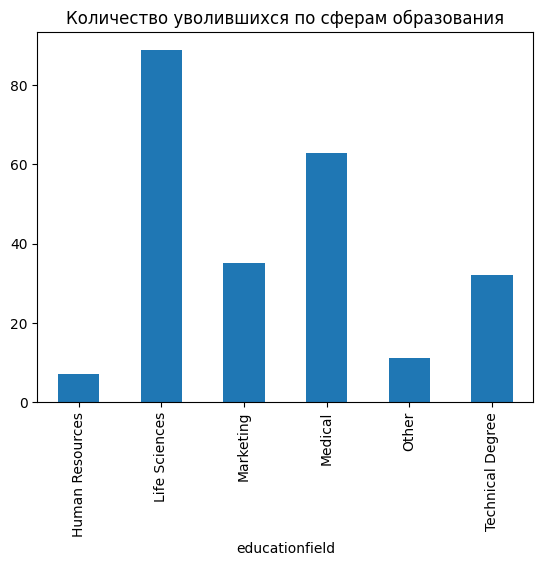

In [40]:
import matplotlib.pyplot as plt

df.groupby('educationfield')['attrition'].sum().plot(kind='bar')
plt.title('Количество уволившихся по сферам образования')
plt.show()

Выведем средние показатели зарплаты сотрудников по их должностям в организациях.

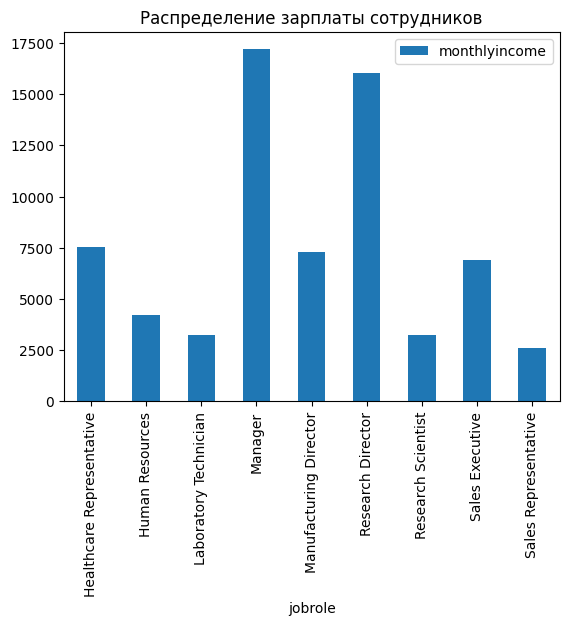

In [41]:
df.groupby('jobrole').agg({'monthlyincome': 'mean'}).plot(kind='bar')
plt.title('Распределение зарплаты сотрудников')
plt.show()

##### Вывод:
Благодаря встроенным инструемнтам и библиотекам на Python можно свободно и просто проводить анализ больших данных, а также отбражать всю найденную информацию в виде таблиц, графиков и других вариантах визуализации информации. Это заметно облегачает анализ и изучение данных. Помимо этого от аналитика не требуется больших знаний самого языка. Команда достаточно примитивные и позволяют пользоваться собой даже начинающему разработчику.

Найденные закономерности однозначно имеют смысл быть и в нашей жизни. В часть найденных закономерностей легко поверить, поскольку они сходятся с жизненными ситуациями и походят на правду.

### Статистический анализ данных

Следующим этапом является статистический анализ. Он позоволит нам проверить некоторые гипотезы, относительно выбранного датасета. Также можно будет высчитать различные статистические данные, которые позволят провести более тщательный анализ датасета.

#### Расчет основных статистических показателей

Для начала отобразим всю основную информацию о датасете.

In [42]:
# Выбираем только числовые столбцы
numeric_cols = df.select_dtypes(include=['number'])

# Основные статистики (включая медиану)
stats = numeric_cols.describe().T.round(2)
stats['median'] = numeric_cols.median()  # Добавляем медиану явно
stats['mode'] = numeric_cols.mode().iloc[0]  # Мода (первое значение, если несколько)
stats['skew'] = numeric_cols.skew().round(2)  # Коэффициент асимметрии

# Упорядочиваем столбцы для наглядности
stats = stats[['count', 'mean', 'median', 'mode', 'std', 'min', '25%', '50%', '75%', 'max', 'skew']]
print(stats)

                    count     mean  median  mode      std     min     25%  \
age                1470.0    36.92    36.0    35     9.14    18.0    30.0   
distancefromhome   1470.0     9.19     7.0     2     8.11     1.0     2.0   
monthlyincome      1470.0  6502.93  4919.0  2342  4707.96  1009.0  2911.0   
totalworkingyears  1470.0    11.28    10.0    10     7.78     0.0     6.0   

                      50%     75%      max  skew  
age                  36.0    43.0     60.0  0.41  
distancefromhome      7.0    14.0     29.0  0.96  
monthlyincome      4919.0  8379.0  19999.0  1.37  
totalworkingyears    10.0    15.0     40.0  1.12  


Таким образом можно вывести общую информацию по всем числовым значениям. Также можно вывести информацию по одному конкретному показателю. Например по заработной плате.

In [43]:
print(f"Средняя зарплата: {df['monthlyincome'].mean().round(2)}")
print(f"Медиана зарплаты: {df['monthlyincome'].median().round(2)}")
print(f"Стандартное отклонение: {df['monthlyincome'].std().round(2)}")
print(f"Квартили:\n{df['monthlyincome'].quantile([0.25, 0.5, 0.75])}")

Средняя зарплата: 6502.93
Медиана зарплаты: 4919.0
Стандартное отклонение: 4707.96
Квартили:
0.25    2911.0
0.50    4919.0
0.75    8379.0
Name: monthlyincome, dtype: float64


Если проводить аналитику полученных данных, то можно сказать, что у нас среднее значение зарплаты больше медианы. Это значит, что к данным о зарплате применимо распределение с правосторонней асимметрией. А высокое стандартное отклонение указывает на высокий разброс данных.

#### Матрица корреляций

Далее построим матрицу корреляций

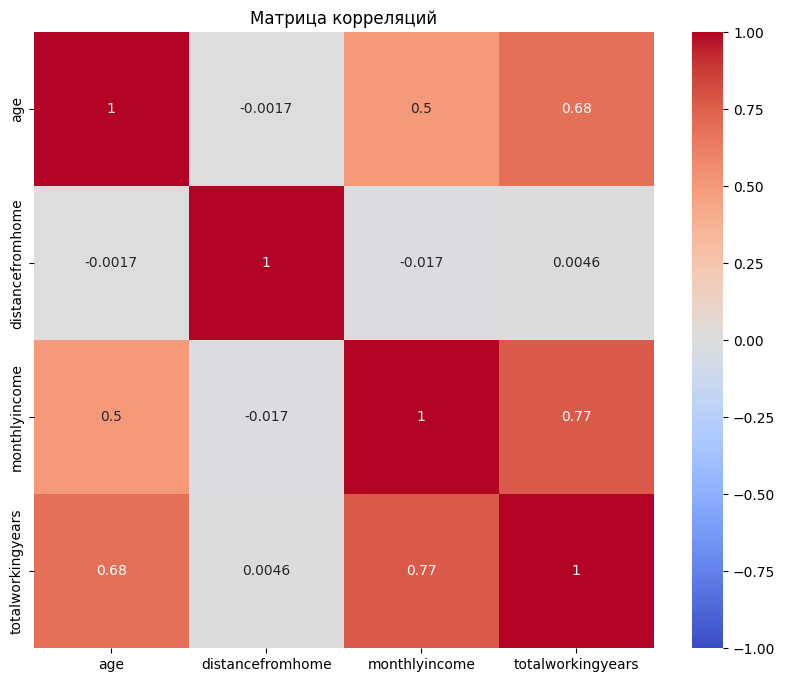

In [44]:
import seaborn as sns

# Выбираем только числовые признаки
numeric_cols = df.select_dtypes(include=['number'])

# Матрица корреляций
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Матрица корреляций')
plt.show()

Дл дальнейшего анализа выявим сильные корреляции

In [45]:
high_corr = corr_matrix[abs(corr_matrix) > 0.7].stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]  # Исключаем диагональ
print(high_corr)

             level_0            level_1         0
3      monthlyincome  totalworkingyears  0.772893
4  totalworkingyears      monthlyincome  0.772893


Можно сделать следующие выводы: Так как показатель r > 0,7 на пересечении таких показателей как "Заработная плата" и "Общий стаж", то можно сказать что чем выше стаж, тем выше зарплата. Также можно заметить умеренную корреляцию на пересечении "Возраста" и "Общего стажа", а также "Возраст" и "Заработная плата". Это может говорить о том, что чем старше сотрудник, тем больше его общий стаж и зарплата. Это очевидная корреляция.

#### Анализ распределений

Далее возьмемся за анализ распределений. Ранее мы уже говорили об этом. Теперь попытаемся их отобразить и проанализиовароть.

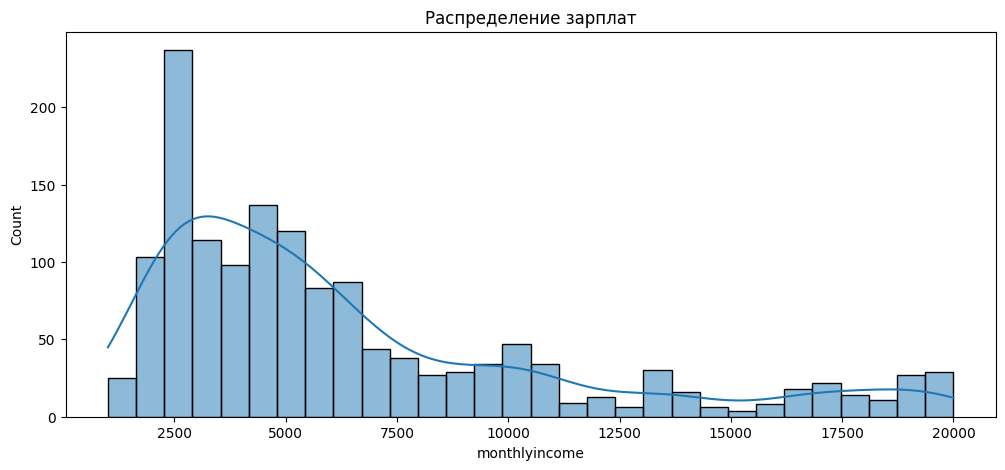

In [46]:
# Для зарплаты
plt.figure(figsize=(12, 5))
sns.histplot(df['monthlyincome'], kde=True, bins=30)
plt.title('Распределение зарплат')
plt.show()

Как мы уже говорили, график распределения образуент распределение с правосторонней ассиметрией. Среднее значение больше медианы.

Построим график распределения для возраста.

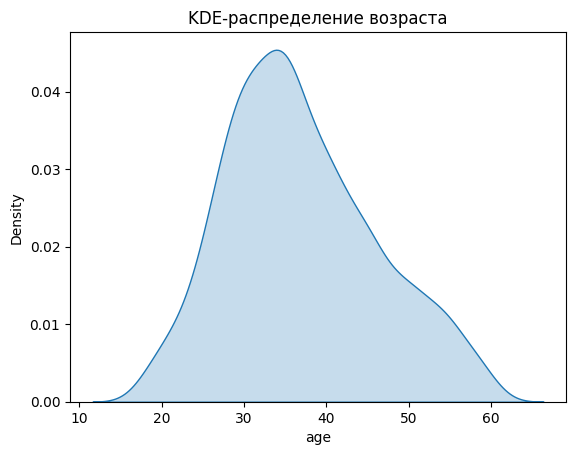

In [47]:
# Для возраста
sns.kdeplot(df['age'], fill=True)
plt.title('KDE-распределение возраста')
plt.show()

График распределения возраста формирует почти что нормальное распределение. Основную целевую адуиторию опроса составляют люди среднего возраста (30-40 лет).

Построим еще один график для зарплаты.

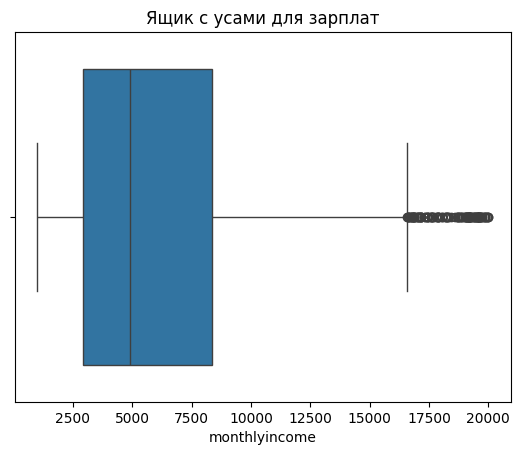

In [48]:
sns.boxplot(x=df['monthlyincome'])
plt.title('Ящик с усами для зарплат')
plt.show()

На данном графике отображено распределение основной части данных, которые разделены медианой.Также можно отметить большое количество выбросов за пределы распределения данных. Это зарплаты менеджеров и других управленцев, которые приближаются к 20к.

#### Таблицы сопряженности для категориальных признаков

Далее построим таблицы сопряжености для категориальных признаков. Это позволит нам оценить не только числовые данные.

attrition      False      True 
overtime                       
False      89.563567  10.436433
True       69.471154  30.528846


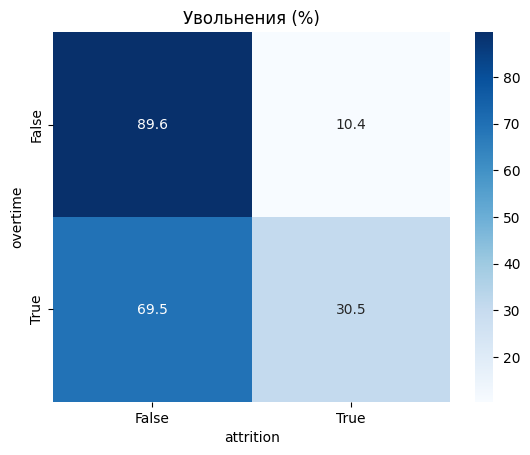

In [49]:
# Зависимость увольнений от переработок
cross_tab = pd.crosstab(df['overtime'], df['attrition'], normalize='index') * 100
print(cross_tab)

# С визуализацией
sns.heatmap(cross_tab, annot=True, fmt='.1f', cmap='Blues')
plt.title('Увольнения (%)')
plt.show()

Полученные данные могут говорить о том, что не всегда переработки являются основным аргументом для увольнения. Почти 70% сотрудников терпят переработку и не увольняются. Однако почти 90% работников, которые не знают, что такое переработка также не увольняются. Что может говорить о том, что наличие переработок - не последняя причина увольнения.

#### Проверка гипотез

Далее займемся проверкой гипотез. Сделаем это с помощью использования различных тестов и категориальных признаков.

Первая нулевая гипотеза - "Средний доход мужчин и женщин одинаков".

In [50]:
from scipy.stats import ttest_ind

male_sal = df[df['gender'] == 'Male']['monthlyincome']
female_sal = df[df['gender'] == 'Female']['monthlyincome']

t_stat, p_value = ttest_ind(male_sal, female_sal, nan_policy='omit')
print(f"p-value: {p_value:.4f}")

p-value: 0.2222


Если p-value > 0.05, гипотеза о равенстве средних не отвергается (различия статистически значимы). Это значит, что различия статистически незначимы. Значит отрицать нулевую гипотезу нельзя.

Следущая проверка - критерий хи квадрат. Нулевая гипотеза "Текучесть кадров зависит от отдела"

In [51]:
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(pd.crosstab(df['department'], df['attrition']))
print(f"p-value: {p:.4f}")

p-value: 0.0045


Данную гипотезу можно отвергнуть, так как связь между отделом и увольнениями статистически значима. Нулевая гипотеза отвергается.

#### Вывод

Можно сделать следующие выводы. С помощью различных инструемнтов статистического анализа можно определить все основные показатели датасета, что поможет более детально изучить информацию. Также это позволяет специалистам сделать какие-то выводы и принять необходимые решения. Как например оценить влияение одного фактора на другой или оценить график распределения заработной платы для исключения выбросов данных и повышения их качества.

Если говорить о данных, то можно сказать о том, что часть выдвинутых гипотез подтвердилось, а сформированные графики и таблицы позволяют проаналиизовать ситуацию на рынке или в организации и найти первопричину текчки кадров. Это позволяет решать проблемы с увольнениями с самого начала, а не только убирать их последствия.

### Графический анализ данных

Присутпим к графическому анализу данных. Данный пункт включает в себя демонстрацию возможностей библиотек для отображения графиков, таблиц и других вариантов визауилации данных.


#### Matplotlib: 3 типа диаграмм
 

Гистограмма распределения возраста

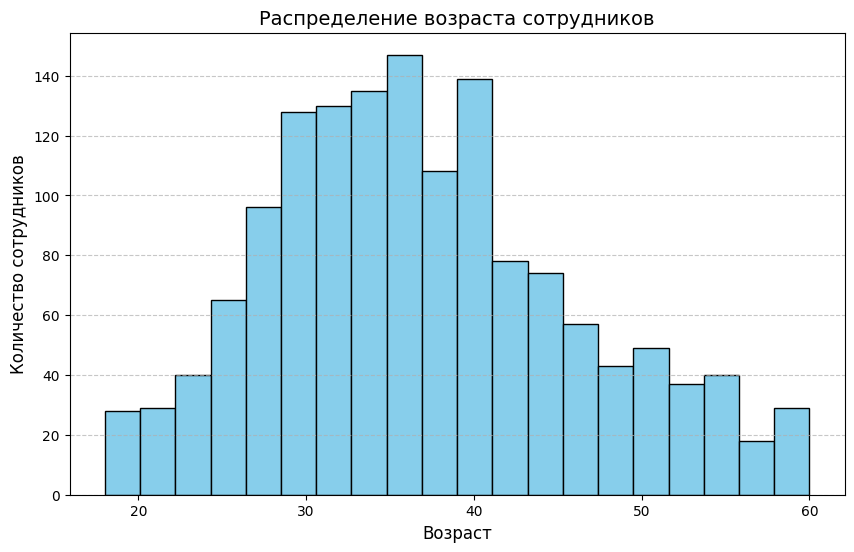

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение возраста сотрудников', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество сотрудников', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Большинство сотрудников в возрасте 30–40 лет. Пик в 35 лет указывает на типичного работника.

Круговая диаграмма увольнений (attrition)

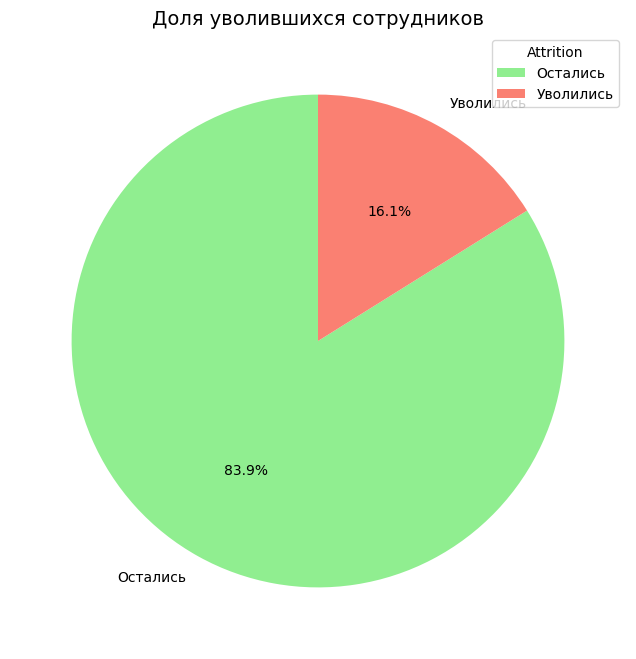

In [53]:
attrition_counts = df['attrition'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(attrition_counts, labels=['Остались', 'Уволились'], 
        autopct='%1.1f%%', colors=['lightgreen', 'salmon'], startangle=90)
plt.title('Доля уволившихся сотрудников', fontsize=14)
plt.legend(title='Attrition', loc='upper right')
plt.show()

Только 16% сотрудников уволились — текучесть умеренная, но требует анализа причин.

Boxplot зарплат по отделам

C:\Users\vlad8\AppData\Local\Temp\ipykernel_12652\3897055488.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['department'] == 'Human Resources']['monthlyincome'],


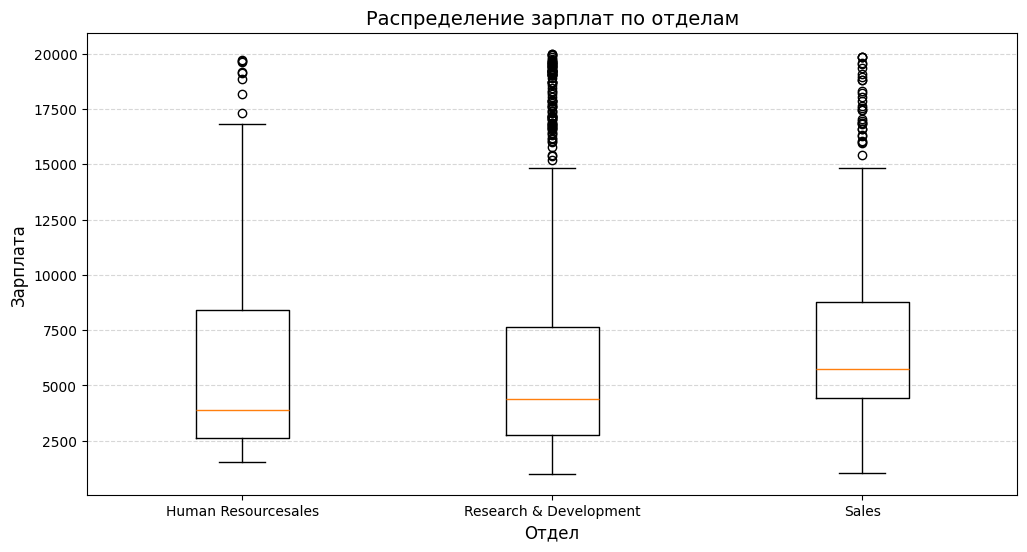

In [55]:
plt.figure(figsize=(12, 6))
plt.boxplot([df[df['department'] == 'Human Resources']['monthlyincome'],
            df[df['department'] == 'Research & Development']['monthlyincome'],
            df[df['department'] == 'Sales']['monthlyincome']],
            labels=['Human Resourcesales', 'Research & Development', 'Sales'])
plt.title('Распределение зарплат по отделам', fontsize=14)
plt.ylabel('Зарплата', fontsize=12)
plt.xlabel('Отдел', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

В Research & Development срдение показатели зарплаты ниже, однако присутствует множество выбросов с наиболее высокими значениями. Самые высокие средние показатели в отделе Human Resources.

#### Seaborn: 2 типа диаграмм

Barplot среднего стажа по образованию.

C:\Users\vlad8\AppData\Local\Temp\ipykernel_12652\2807052503.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='educationfield', y='totalworkingyears', data=df, ci=None, palette='viridis')
C:\Users\vlad8\AppData\Local\Temp\ipykernel_12652\2807052503.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='educationfield', y='totalworkingyears', data=df, ci=None, palette='viridis')


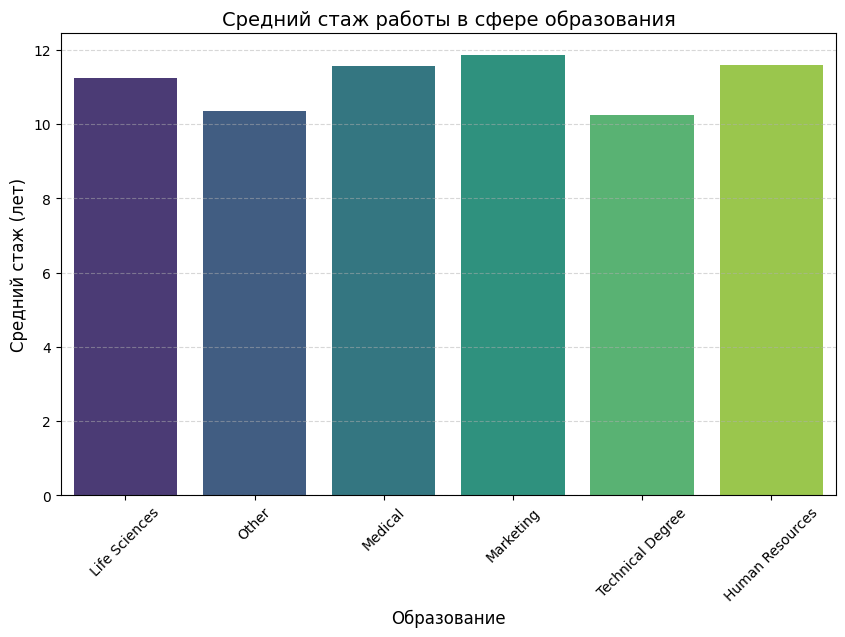

In [65]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='educationfield', y='totalworkingyears', data=df, ci=None, palette='viridis')
plt.title('Средний стаж работы в сфере образования', fontsize=14)
plt.xlabel('Образование', fontsize=12)
plt.ylabel('Средний стаж (лет)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Сотрудники в Marketing имеют наибольший стаж (в среднем 12 лет), что подтверждает их карьерную устойчивость.

Scatterplot возраста и зарплаты с учетом увольнений.

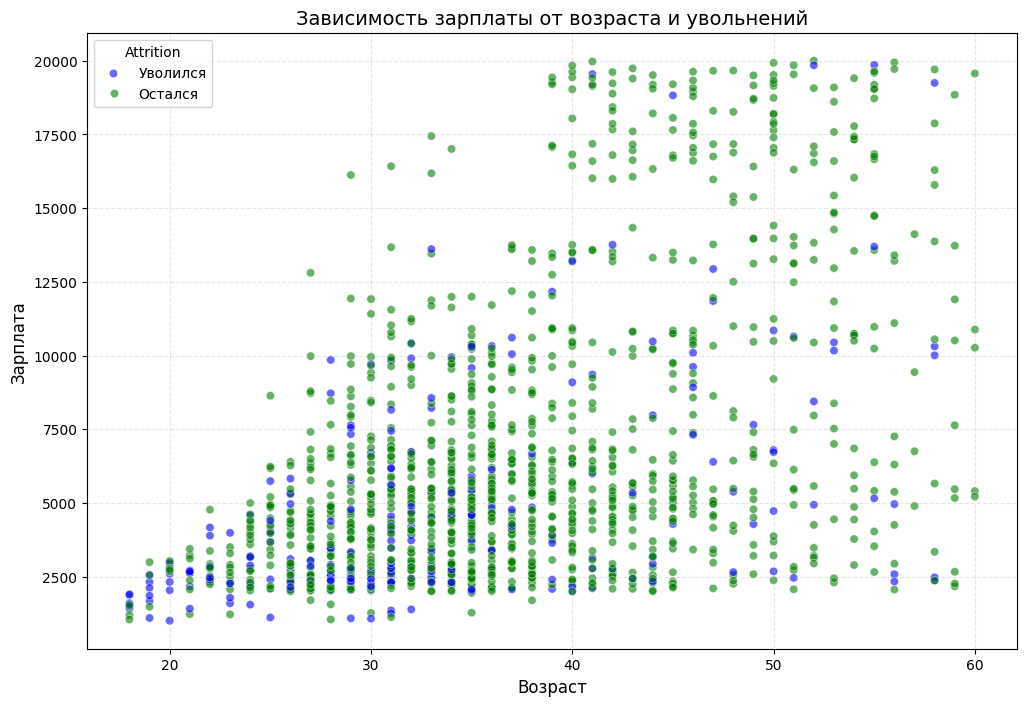

In [66]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='monthlyincome', hue='attrition', 
                data=df, palette={0: 'green', 1: 'blue'}, alpha=0.6)
plt.title('Зависимость зарплаты от возраста и увольнений', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Зарплата', fontsize=12)
plt.legend(title='Attrition', labels=['Уволился', 'Остался'])
plt.grid(linestyle='--', alpha=0.3)
plt.show()

Уволившиеся чаще моложе 30 и получают низкую зарплату.

#### Портрет типичного потребителя

Так как оси и информация на них была настроена в процесса разработки графиков можн оприступить к третьей части задачи - описать портрет типичного сотрудника на основе наших данных.

Возраст: 30–40 лет.

Образование: Marketing.

Стаж: 5–10 лет.

Зарплата: $6502.93.

Группа риска для увольнения: молодые сотрудники (до 35 лет) с низкой зарплатой.

Наименьшая текучесть в Research & Development, наибольшая — в Sales.

Исходя из всех данных можно разработать слдедующие рекомендации для HR-специалистов для уменьшения текучести кадров.

#### **Детальные рекомендации для HR по снижению текучести кадров**

На основе анализа данных (включая статистику, корреляции и графики) предлагается стратегия, направленная на ключевые «болевые точки». Рекомендации разделены по приоритетам и категориям.

#### **1. Для сотрудников группы риска (молодые, низкая зарплата, Sales/HR)**
##### **1.1. Программы удержания**
- **Финансовая поддержка**:
  - Ввести **бонусы за лояльность** для сотрудников с стажем 1–3 года.
  - Пересмотреть вилки зарплат для младших позиций в **Sales** и **HR** (сравнить с рыночными).
- **Карьерные треки**:
  - Разработать **индивидуальные планы развития** (IDP) с четкими KPI для повышения.
  - Запустить **менторскую программу**, где опытные сотрудники курируют новичков.

##### **1.2. Улучшение условий труда**
- **Гибкий график** для сотрудников с длительной commute (если корреляция «Distance–Attrition» станет значима).
- **Проектная ротация** для снижения монотонности (особенно в Sales).

---

#### **2. Для ключевых отделов (Sales, HR)**
##### **2.1. Sales-отдел**
- **Мотивация**:
  - Ввести **нефинансовые стимулы** (например, дополнительные дни отпуска за превышение плана).
  - Разделить KPI на **краткосрочные** (квартальные) и **долгосрочные** (годовые).
- **Анализ причин увольнений**:
  - Провести **exit-интервью** с фокусом на:
    - Условия работы.
    - Отношения с менеджментом.

##### **2.2. HR-отдел**
- **Обучение руководителей**:
  - Тренинги по **эмоциональному интеллекту** (снижение конфликтов).
  - Внедрить **ежеквартальные pulse-опросы** для оценки климата в командах.

---

#### **3. Для опытных сотрудников (стаж 5+ лет, PhD)**
##### **3.1. Удержание экспертов**
- **Кастомизация benefits**:
  - Опции на выбор: ДМС, обучение, абонементы в спортзал.
- **Роль внутренних тренеров**:
  - Привлекать к обучению новичков с доплатой 10–15% к окладу.

##### **3.2. Профилактика выгорания**
- **Перерыв в карьере** (sabbatical) после 7+ лет в компании.
- **Горизонтальный рост**:
  - Возможность перехода в смежные департаменты (например, из R&D в Product Management).

---

#### **4. Системные инициативы**
##### **4.1. Data-Driven HR**
- **Модель прогнозирования текучести**:
  - Раз в месяц анализировать риск увольнений на основе:
    - Зарплаты.
    - Удовлетворенности (данные опросов).
    - Участия в проектах.
- **A/B-тестирование инициатив**:
  - Например, сравнить эффективность бонусов vs. обучения для разных групп.

##### **4.2. Корпоративная культура**
- **Признание заслуг**:
  - Ежемесячные номинации (не только «Лучший продажник», но и «За вклад в командную работу»).
- **Прозрачность**:
  - Публикация **карьерных историй** сотрудников, выросших внутри компании.

---

#### **5. Контроль эффективности**
- **Метрики успеха** (через 6–12 месяцев):
  | Метрика                | Целевое значение |
  |------------------------|------------------|
  | Текучесть в Sales      | Снижение на 25%  |
  | Удовлетворенность (pulse-опрос) | Рост на 15% |
  | % сотрудников на IDP   | 80%              |

---

##### **Заключение**
Рекомендации сочетают **точечные меры** для групп риска и **системные изменения**. Ключевые принципы:
1. **Персонализация** — нет универсальных решений.  
2. **Проактивность** — прогнозирование рисков до увольнения.  
3. **Прозрачность** — сотрудники должны видеть карьерные возможности.  

Для реализации можно начать с **пилотных проектов** (например, в Sales или среди молодых специалистов) и масштабировать успешные практики.